In [1]:
import matplotlib.pyplot as plt 
import pandas as pd
import csv 
import qutip
import numpy as np
import qutip
from qiskit import QuantumCircuit
import numpy as np
import QUEVO
from math import ceil
import itertools

In [2]:
mutation_prob = 5
number_of_runs=50
gates = 15 # 5,10,15,20
chromosomes = 20
generations = 200
gate_types = ['cx', 'x', 'h', 'rxx', 'rzz', 'swap', 'z', 'y', 'toffoli']
target_entanglement = [0.999999]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def run_evolution(number_of_runs, mutation_prob):
    
    all_fitness_data = []
    
    for i in range(0, number_of_runs):
        
        init_gen = QUEVO.Generation(chromosomes, gates)
        init_gen.create_initial_generation(gate_types)

        init_gen.run_generation(target_entanglement)

        current_chromosome = init_gen.get_best_chromosome()
        best_chromosome = current_chromosome
        final_fitness = init_gen.get_best_fitness()

        final_fitness_list = [final_fitness]


        for gen in range(0, generations):
            init_gen.evolve_into_next_generation(mutation_prob) 
            init_gen.run_generation(target_entanglement) 

            current_fitness = init_gen.get_best_fitness()
            current_chromosome = init_gen.get_best_chromosome()
            print((str(gen + 1)+"\n")+str(current_fitness),end='')

            if final_fitness > abs(current_fitness):
                final_fitness = current_fitness
                best_chromosome = current_chromosome

            final_fitness_list.append(current_fitness)
            if current_fitness < 0.01:
                break
                
        all_fitness_data.append(final_fitness_list)
        print("Run ", i+1, " completed ")
        
    # calculate mean and standard deviation
    mean_fitness = np.mean(all_fitness_data, axis=0)
    std_fitness = np.std(all_fitness_data, axis=0)
    standard_error = std_fitness / np.sqrt(number_of_runs)

    # print the mean fitness, standard deviation, and standard error
    mean_fitness = np.mean(all_fitness_data, axis=0)
    std_dev_fitness = np.std(all_fitness_data, axis=0)
    std_err_fitness = std_dev_fitness / np.sqrt(len(all_fitness_data))

    print('Mean fitness: ', mean_fitness)
    print('Standard deviation of fitness: ', std_dev_fitness)
    print('Standard error of the mean fitness: ', std_err_fitness)
    
        # save the data to a CSV file
    #data = np.column_stack((mean_fitness, std_fitness, standard_error))
    #np.savetxt('fitness_data.csv', data, delimiter=',')
    

    return mean_fitness, std_fitness, standard_error

mean_fitness, std_fitness, standard_error = run_evolution(number_of_runs=50, mutation_prob=5)


1
0.499998999999999862
0.49999899999999993
0.49999899999999994
0.49999899999999995
0.49999899999999996
0.49999899999999997
0.49999899999999998
0.49999899999999999
0.499998999999999910
0.499998999999999911
0.499998999999999912
0.499998999999999913
0.516670437529042114
0.538071928694228815
0.500488103780824616
0.499998999999999917
0.499998999999999918
0.499998999999999919
0.540326783630260120
0.499998999999999921
0.540326783630260322
0.540326783630260323
0.540326783630260224
0.540326783630260325
0.499998999999999926
0.540326783630260327
0.499998999999999928
0.550681823349095329
0.535517234073927230
0.550681823349095331
0.540326783630260332
0.550681823349095333
0.634587684786620334
0.550681823349095335
0.550681823349095336
0.540326783630260137
0.540326783630260238
0.540326783630260339
0.550681823349095340
0.550681823349095341
0.550681823349095342
0.540326783630260343
0.550681823349095344
0.550681823349095345
0.518748894037193246
0.540326783630260247
0.550681823349095348
0.5506818233490953

0.5955020258015382184
0.6082724690144075185
0.53954154718771186
0.5723195063965435187
0.4999989999999999188
0.5970298596956785189
0.5697963318073964190
0.4999989999999999191
0.4999989999999999192
0.5723195063965435193
0.53954154718771194
0.541699945081551195
0.5920839587324249196
0.6131974451657671197
0.4999989999999999198
0.4999989999999999199
0.582949665136879200
0.4999989999999999Run  2  completed 
1
0.49999899999999992
0.499998999999999973
0.50310778294677634
0.50310778294677635
0.49999899999999996
0.49999899999999997
0.55372191708108088
0.49999899999999999
0.557920787930174910
0.499998999999999911
0.499998999999999912
0.552624728282065813
0.499998999999999914
0.499998999999999915
0.499998999999999916
0.499998999999999917
0.499998999999999918
0.499998999999999919
0.499998999999999920
0.499998999999999921
0.529805109075593922
0.499998999999999923
0.499998999999999924
0.499998999999999925
0.499998999999999926
0.499998999999999927
0.499998999999999928
0.499998999999999929
0.4999989999

0.6369878274081511166
0.6413884839700315167
0.6208156705017438168
0.5991430282017347169
0.5792228706579533170
0.589537453837768171
0.5991853872988502172
0.5597025934537952173
0.6377516851294875174
0.5866104170767479175
0.6220809794350307176
0.675133754838825177
0.6377210269558247178
0.6081081497735492179
0.6220809794350307180
0.6188036953526896181
0.6051717824145237182
0.5597025934537952183
0.6367435008698143184
0.5597025934537952185
0.5866104170767479186
0.6500682440024279187
0.6500682440024279188
0.6307856960306524189
0.6188036953526896190
0.6051717824145239191
0.6236402959513709192
0.6185200800732203193
0.6185200800732203194
0.6188036953526896195
0.6188036953526896196
0.6777775461019556197
0.6354087451549089198
0.6610341413168916199
0.5446526910197929200
0.5866104170767479Run  4  completed 
1
0.54687866263415562
0.54961255501479523
0.54961255501479524
0.56171189960259835
0.49999899999999996
0.49999899999999997
0.56171189960259838
0.56171189960259839
0.499998999999999910
0.4999989999

0.5690345937288491152
0.4999989999999999153
0.5689930971821506154
0.5490944749345532155
0.4999989999999999156
0.569034593728849157
0.4999989999999999158
0.4999989999999999159
0.4999989999999999160
0.6220074679281462161
0.6265164591090455162
0.4999989999999999163
0.4999989999999999164
0.569034593728849165
0.4999989999999999166
0.5690345937288492167
0.49999899999999997168
0.49999899999999997169
0.4999989999999999170
0.5690345937288492171
0.499999172
0.569034593728849173
0.4999989999999999174
0.569034593728849175
0.49999899999999997176
0.569034593728849177
0.569034593728849178
0.6220074679281462179
0.5441508440112253180
0.49999899999999997181
0.4999989999999999182
0.605497860309242183
0.49999899999999997184
0.499999185
0.5690345937288492186
0.569034593728849187
0.4999989999999999188
0.5690345937288491189
0.605497860309242190
0.49999899999999997191
0.5569391310833123192
0.5690345937288491193
0.6220074679281462194
0.6651296134556521195
0.4999989999999999196
0.569034593728849197
0.4999989999

0.5474530272563939135
0.6309916758014831136
0.5371332715123354137
0.5653294705453402138
0.5474530272563939139
0.5534537413030907140
0.6145095120698345141
0.5587062464047846142
0.5464661249004795143
0.6993333173663047144
0.6332619155208175145
0.6196268039504231146
0.6272446338823452147
0.6296615094759195148
0.5395113200322849149
0.561963455308553150
0.5694243319111171151
0.6473406852213264152
0.5628421194425173153
0.6284399951256128154
0.6197239430674446155
0.5578678966381605156
0.6782811329673185157
0.5646065126344813158
0.6231336915194747159
0.6314721777002062160
0.6296615094759195161
0.6401477550506867162
0.561963455308553163
0.6287493532456122164
0.6352651768317753165
0.5592475209474148166
0.6528090912571589167
0.5375649286528164168
0.5450918709180863169
0.620645803433306170
0.6196268039504231171
0.6347941661609299172
0.620645803433306173
0.5375649286528164174
0.6812855615491609175
0.5375649286528164176
0.6352651768317753177
0.6528090912571589178
0.5670820924956189179
0.552950130674

0.5150012259028076116
0.516845224833377117
0.5150012259028076118
0.5168452248333769119
0.5286463509539312120
0.4999989999999999121
0.516845224833377122
0.5672347535128828123
0.5160626447503888124
0.5405295475445804125
0.5322588459065709126
0.4999989999999999127
0.5405295475445804128
0.5560116398077983129
0.5436790974901374130
0.5160626447503888131
0.5575504419219894132
0.5286463509539312133
0.4999989999999999134
0.5160626447503888135
0.5160626447503888136
0.516845224833377137
0.5405295475445804138
0.516845224833377139
0.5339845603718767140
0.5160626447503888141
0.4999989999999999142
0.5330553023406434143
0.516845224833377144
0.5732897273344439145
0.5405295475445804146
0.5382872400372274147
0.516845224833377148
0.516845224833377149
0.5286463509539312150
0.4999989999999999151
0.5008102119511455152
0.5160626447503888153
0.4999989999999999154
0.4999989999999999155
0.4999989999999999156
0.5160626447503888157
0.4999989999999999158
0.4999989999999999159
0.516845224833377160
0.4999989999999999

0.505175082994049699
0.4999989999999999100
0.4999989999999999101
0.49999899999999986102
0.4999989999999999103
0.49999899999999986104
0.4999989999999999105
0.4999989999999999106
0.49999899999999986107
0.536666248229148108
0.4999989999999999109
0.49999899999999986110
0.49999899999999986111
0.4999989999999999112
0.49999899999999986113
0.49999899999999986114
0.4999989999999999115
0.49999899999999986116
0.49999899999999986117
0.4999989999999999118
0.4999989999999999119
0.4999989999999999120
0.4999989999999999121
0.4999989999999999122
0.4999989999999999123
0.4999989999999999124
0.4999989999999999125
0.4999989999999999126
0.4999989999999999127
0.4999989999999999128
0.4999989999999999129
0.4999989999999999130
0.4999989999999999131
0.49999899999999986132
0.4999989999999999133
0.4999989999999999134
0.4999989999999999135
0.4999989999999999136
0.4999989999999999137
0.4999989999999999138
0.4999989999999999139
0.4999989999999999140
0.4999989999999999141
0.4999989999999999142
0.4999989999999999143
0.

0.55462954832275380
0.569034593728849181
0.563315827531496882
0.561221116101429883
0.520169891649757984
0.520169891649757885
0.55462954832275386
0.581412121198421687
0.55462954832275388
0.537147979523138289
0.564833443848072990
0.539840696891472791
0.564833443848072992
0.522702133452880993
0.499998999999999994
0.520169891649757995
0.520169891649757996
0.564833443848072997
0.560690329510003198
0.520169891649757999
0.550037327398726100
0.5201698916497579101
0.550037327398726102
0.5493498408003328103
0.5493498408003328104
0.5493498408003328105
0.5201698916497578106
0.5201698916497579107
0.5493498408003328108
0.520957418933358109
0.5493498408003328110
0.5493498408003328111
0.5493498408003328112
0.5493498408003328113
0.5201698916497579114
0.5493498408003328115
0.499999116
0.5493498408003328117
0.5201698916497579118
0.5201698916497579119
0.5754934352257385120
0.5493498408003328121
0.5201698916497579122
0.4999989999999999123
0.5493498408003328124
0.5201698916497579125
0.5493498408003328126
0.

0.608939995413306567
0.653851832856467568
0.569034593728849169
0.535009091744987170
0.62721072027449171
0.499998999999999972
0.54464741294664673
0.552601734910108674
0.592597587631845175
0.54464741294664676
0.558210405027891877
0.558210405027891578
0.54464741294664679
0.595029730832016380
0.5654071363666681
0.569034593728849182
0.635385641690923483
0.56903459372884984
0.54464741294664685
0.59855478707009586
0.569034593728849187
0.614565157328793588
0.574216783277769889
0.56903459372884990
0.507513261032304291
0.574216783277769992
0.56903459372884993
0.651357952204086994
0.501083948548913195
0.569034593728849196
0.548507092331153297
0.552423114908968798
0.595029730832016399
0.5690345937288491100
0.6358012250960654101
0.5690345937288491102
0.5690345937288491103
0.5778525980085039104
0.5524231149089687105
0.6186980402370266106
0.6150107171152227107
0.5690345937288491108
0.5524231149089687109
0.569034593728849110
0.5742167832777698111
0.544647412946646112
0.6212313422550033113
0.5742167832

0.4999989999999999750
0.499998999999999951
0.546076766990855652
0.523247212408340753
0.56788005589277554
0.499998999999999955
0.526138467595560856
0.517169116387727257
0.4999989999999999758
0.499998999999999959
0.514717217300211560
0.515983956299128661
0.523756628149684562
0.499998999999999963
0.4999989999999999764
0.523756628149684565
0.509790288483356566
0.499998999999999967
0.525497778136346668
0.558746772425202869
0.522878502791550370
0.523756628149684571
0.526707935405385472
0.558746772425202873
0.4999989999999999774
0.578946571740711175
0.523756628149684576
0.4999989999999999777
0.571077786613256178
0.577913981971030679
0.577913981971030680
0.499998999999999981
0.608213952173405882
0.546076766990855583
0.546076766990855584
0.499998999999999985
0.49999986
0.546076766990855587
0.546076766990855588
0.499998999999999989
0.4999989999999998690
0.546076766990855591
0.518878617885555192
0.518878617885555193
0.518878617885555194
0.499998999999999995
0.499998999999999996
0.4999989999999999

0.61208701308065332
0.641869211515108933
0.569034593728849134
0.569034593728849135
0.499998999999999936
0.569034593728849137
0.499998999999999938
0.569034593728849139
0.570902163408431940
0.546767910684224741
0.499998999999999942
0.569034593728849143
0.606661524030730944
0.601035698036944645
0.499998999999999946
0.569034593728849147
0.609219921079195148
0.499998999999999949
0.633533425105876350
0.569335963722769851
0.499998999999999952
0.717470216813712653
0.696642429695095754
0.499998999999999955
0.613525765120677656
0.666665666666666657
0.680133108909840758
0.678198037380852759
0.499998999999999960
0.569034593728849261
0.612712237547066862
0.638363040800754863
0.681867626556833364
0.569034593728849165
0.706550539640979466
0.72993437465116867
0.499998999999999968
0.569034593728849169
0.499998999999999970
0.499998999999999971
0.499998999999999972
0.499998999999999973
0.569034593728849174
0.605497860309241975
0.499998999999999976
0.569034593728849177
0.499998999999999978
0.4999989999999

0.586551174662180813
0.52146092557391814
0.598964108555633915
0.569774423471527816
0.591853845116108417
0.591853845116108418
0.542186147790937519
0.539634137024875720
0.591853845116108421
0.62297530637629422
0.502091465491793623
0.550116952652170824
0.584134286842647925
0.542186147790937726
0.591853845116108427
0.570908664598695728
0.542186147790937529
0.591853845116108430
0.542186147790937531
0.631939794513259932
0.539634137024875733
0.539634137024875834
0.578299148759971135
0.568991719787168836
0.642833590678627637
0.539634137024875838
0.550116952652170839
0.604358822224842440
0.590896174594216141
0.577042240629904242
0.550116952652170843
0.548860608471484944
0.539634137024875845
0.568991719787168846
0.542186147790937547
0.542186147790937748
0.605767199372650749
0.549735054308779850
0.539634137024875851
0.550116952652170852
0.599473755025753153
0.542186147790937754
0.542186147790937555
0.591853845116108456
0.539634137024875857
0.591853845116108458
0.542186147790937559
0.5918538451161

0.6354883200827455196
0.658256378131274197
0.6349534474174268198
0.5487003962592109199
0.639721468441907200
0.6384860982169558Run  23  completed 
1
0.49999899999999992
0.49999899999999993
0.52534426987864884
0.56436569344432375
0.52307208451391556
0.53118390275140117
0.54559585633668818
0.52989963798919159
0.523072084513915510
0.531526301023556511
0.512644306951286712
0.523392065019559913
0.517940898223991314
0.516492660809445115
0.523249005421548616
0.569741324108707117
0.521881287051652218
0.571335099608599519
0.516089433381319720
0.572947208020056621
0.566278200455703522
0.556887571192929223
0.554236962742818124
0.499998999999999925
0.554609809826617526
0.540640389580651527
0.54903976721488628
0.574180343658452329
0.572947208020056630
0.593873043054633731
0.531666071194456132
0.524279604806561433
0.620938310793845534
0.585895860615120235
0.55240468660929436
0.558055800669790137
0.537265292277155238
0.4999989999999998639
0.548383146022808140
0.559470083450628941
0.569034593728849142


0.6641178329427802178
0.5478812079035782179
0.5690345937288492180
0.5478812079035782181
0.5687770359373374182
0.7201596692874119183
0.5667115821263524184
0.6117644980758272185
0.605497860309242186
0.5351178631255593187
0.5478812079035782188
0.5478812079035782189
0.5690345937288492190
0.499999191
0.569034593728849192
0.5478812079035782193
0.7192407243232242194
0.5690345937288491195
0.5478812079035782196
0.5478812079035782197
0.5478812079035782198
0.6449054964801595199
0.5478812079035782200
0.5472039060634601Run  25  completed 
1
0.56903459372884912
0.56903459372884913
0.5470884773346434
0.57972768947995675
0.56903459372884916
0.56903459372884917
0.5690345937288498
0.50709633767046389
0.499998999999999910
0.568750438791106811
0.56337487152809112
0.546432386254394313
0.571373447236788414
0.538310409279176715
0.513094830283574216
0.526509898002972817
0.59038428283211818
0.58435307225419619
0.569948965633375220
0.581344186231251621
0.584663628504932622
0.648873546638552523
0.563826080114405

0.4999989999999999160
0.4999989999999999161
0.4999989999999999162
0.4999989999999999163
0.4999989999999999164
0.4999989999999999165
0.4999989999999999166
0.4999989999999999167
0.4999989999999999168
0.4999989999999999169
0.4999989999999999170
0.4999989999999999171
0.4999989999999999172
0.4999989999999999173
0.4999989999999999174
0.4999989999999999175
0.4999989999999999176
0.4999989999999999177
0.4999989999999999178
0.49999899999999986179
0.49999899999999986180
0.4999989999999999181
0.4999989999999999182
0.4999989999999999183
0.5446405760472587184
0.4999989999999999185
0.4999989999999999186
0.4999989999999999187
0.4999989999999999188
0.4999989999999999189
0.4999989999999999190
0.4999989999999999191
0.4999989999999999192
0.4999989999999999193
0.4999989999999999194
0.4999989999999999195
0.4999989999999999196
0.4999989999999999197
0.4999989999999999198
0.4999989999999999199
0.4999989999999999200
0.4999989999999999Run  27  completed 
1
0.49999899999999992
0.49999899999999993
0.49999899999999

0.6152753734570614142
0.5512119250005196143
0.5271826408114988144
0.5490012768612873145
0.5490012768612873146
0.4999989999999999147
0.5490012768612873148
0.4999989999999999149
0.4999989999999999150
0.4999989999999999151
0.4999989999999999152
0.4999989999999999153
0.5981093285487036154
0.4999989999999999155
0.5490012768612873156
0.5981040120068241157
0.5483351150389913158
0.5490012768612873159
0.5768923496627398160
0.5490012768612873161
0.5898807587018124162
0.5690345937288491163
0.5271826408114988164
0.5552521722936257165
0.5981093285487036166
0.5490012768612873167
0.5271826408114988168
0.5490012768612873169
0.56859507191047170
0.4999989999999999171
0.5490012768612873172
0.5490012768612873173
0.5490012768612873174
0.4999989999999999175
0.5571665119962217176
0.5271826408114988177
0.5271826408114988178
0.5490012768612873179
0.5271826408114988180
0.5550462861190512181
0.6158807769251592182
0.5490012768612873183
0.5490012768612873184
0.5271826408114988185
0.5271826408114988186
0.6202332171

0.4999989999999999125
0.5082349860275224126
0.5351257712020705127
0.55483593061691128
0.5351257712020705129
0.5351257712020705130
0.55483593061691131
0.5511120051800674132
0.5511120051800674133
0.5511120051800675134
0.4999989999999999135
0.5511120051800675136
0.5511120051800675137
0.5511120051800674138
0.5511120051800674139
0.4999989999999999140
0.5511120051800674141
0.5511120051800674142
0.5511120051800674143
0.5286095316857296144
0.5511120051800674145
0.5286095316857296146
0.4999989999999999147
0.5511120051800675148
0.5071078632138146149
0.5479048000559679150
0.5479048000559679151
0.523616362015277152
0.5479048000559679153
0.5511120051800675154
0.5511120051800675155
0.5055958481087119156
0.5511120051800675157
0.5511120051800675158
0.523616362015277159
0.5511120051800675160
0.5479048000559679161
0.5511120051800675162
0.5479048000559679163
0.5479048000559679164
0.5511120051800675165
0.5511120051800675166
0.5511120051800675167
0.5511120051800675168
0.5479048000559679169
0.52361636201527

0.5503982454123263110
0.5503982454123262111
0.5503982454123262112
0.5503982454123263113
0.499999114
0.5333478987646336115
0.5503982454123263116
0.5414736618768393117
0.5414736618768393118
0.5503982454123262119
0.5673652609300635120
0.6396782284392674121
0.5503982454123262122
0.6371983429145245123
0.5673652609300635124
0.5673652609300633125
0.5673652609300635126
0.5519061468070979127
0.6596636008083492128
0.6368965922224852129
0.6381357586451402130
0.5503800418743683131
0.6596636008083491132
0.5597439669647509133
0.6454088671634279134
0.6368965922224852135
0.6625383372001707136
0.5908898313233395137
0.5597439669647509138
0.5597439669647509139
0.5597439669647509140
0.6143231552709814141
0.5597439669647509142
0.5985711343602794143
0.6371892713223118144
0.6397676472376335145
0.5597439669647509146
0.61768926052492147
0.5504440112358707148
0.6399662860459524149
0.6596636008083492150
0.5597439669647509151
0.5668687195553839152
0.658213888088629153
0.5597439669647509154
0.6368965922224852155
0

0.548363142867610792
0.499998999999999993
0.548363142867610794
0.540313954184033995
0.612973420407864596
0.548363142867610897
0.666983681869933898
0.645418381922441799
0.582343993296426100
0.705314618557195101
0.610873721643107102
0.6129678759344558103
0.6237719218157837104
0.5483631428676108105
0.6375330565318194106
0.6288492492301225107
0.5180091638786164108
0.6240409187051785109
0.6129734204078645110
0.6449025945470335111
0.5494295586012882112
0.6449025945470337113
0.557116870316058114
0.59007388501438115
0.6669836818699338116
0.6128785227092832117
0.6088162088163565118
0.6110219186914783119
0.5622225863174904120
0.6449025945470337121
0.6449025945470337122
0.5483631428676108123
0.6127079362136777124
0.59007388501438125
0.5917374605225965126
0.6449025945470337127
0.6049526211258094128
0.5848525798616817129
0.593878419789826130
0.5356144149039791131
0.5238463762913603132
0.5921419102175584133
0.5358625914101879134
0.6080206650233579135
0.5839048865808574136
0.6116406612943257137
0.611

0.567654126356685773
0.559571640961265274
0.499998999999999975
0.594928466823060176
0.550064175351387277
0.550064175351387178
0.63088622888369579
0.617344660716361780
0.616655584705041481
0.604302512888187682
0.591381564819102583
0.635407204899904284
0.567654126356685785
0.619580682635223386
0.567654126356685787
0.559571640961265288
0.567654126356685789
0.567654126356685790
0.600035294054235391
0.57426792199461492
0.544496120418540893
0.567654126356685794
0.612951795539767995
0.567654126356685796
0.550064175351387297
0.567654126356685798
0.598916071645447599
0.5887972383172804100
0.6195806826352231101
0.6000352940542353102
0.5676541263566857103
0.5676541263566857104
0.5676541263566857105
0.613367718648186106
0.5266117607086207107
0.5988292229707683108
0.6240621794124714109
0.5595716409612652110
0.5676541263566857111
0.5676541263566857112
0.5676541263566857113
0.5676541263566857114
0.5676541263566857115
0.6102506002749547116
0.533142924200728117
0.6075378835932727118
0.56765412635668571

0.499998999999999954
0.499998999999999955
0.499998999999999956
0.499998999999999957
0.499998999999999958
0.499998999999999959
0.499998999999999960
0.499998999999999961
0.499998999999999962
0.499998999999999963
0.499998999999999964
0.499998999999999965
0.499998999999999966
0.499998999999999967
0.499998999999999968
0.499998999999999969
0.499998999999999970
0.499998999999999971
0.499998999999999972
0.499998999999999973
0.499998999999999974
0.543454443172386275
0.499998999999999976
0.499998999999999977
0.499998999999999978
0.499998999999999979
0.499998999999999980
0.499998999999999981
0.499998999999999982
0.499998999999999983
0.499998999999999984
0.499998999999999985
0.499998999999999986
0.499998999999999987
0.4999989999999998688
0.499998999999999989
0.499998999999999990
0.499998999999999991
0.499998999999999992
0.499998999999999993
0.499998999999999994
0.499998999999999995
0.4999989999999998696
0.499998999999999997
0.499998999999999998
0.499998999999999999
0.4999989999999999100
0.49999899

0.504805269442389839
0.504805269442389840
0.543482491269555741
0.504805269442389842
0.514560588274616943
0.504805269442389744
0.552569249883365245
0.504805269442389746
0.54498767258361847
0.54498767258361848
0.504805269442389749
0.532462213689727850
0.504805269442389751
0.549542720963969452
0.504805269442389753
0.504805269442389854
0.504805269442389755
0.543482491269555756
0.518621450865183657
0.504805269442389758
0.549542720963969359
0.503076971279322260
0.549542720963969261
0.504805269442389862
0.501583811019602563
0.505130290439114664
0.549542720963969365
0.543482491269555766
0.504805269442389767
0.543482491269555768
0.514560588274616969
0.549542720963969370
0.520743175592309171
0.543482491269555772
0.549542720963969373
0.504805269442389874
0.546516192044573475
0.558003940047183776
0.546516192044573277
0.528808979526250578
0.546516192044573279
0.61891545056905280
0.567410324643698781
0.546516192044573282
0.623038091887041783
0.623038091887041684
0.546516192044573485
0.66894036862173

0.569034593728849120
0.558144287005519521
0.569034593728849122
0.558144287005519523
0.569034593728849124
0.569034593728849125
0.543811170720634626
0.569034593728849127
0.558144287005519528
0.60941188609884829
0.652216014038742530
0.569034593728849131
0.558144287005519532
0.530814162844674433
0.558144287005519534
0.569034593728849135
0.543811170720634636
0.543811170720634637
0.543811170720634738
0.51548612668676439
0.543811170720634640
0.543811170720634741
0.547487464488012242
0.543811170720634743
0.547487464488012344
0.546301272087007745
0.543811170720634646
0.543811170720634647
0.548677204309098848
0.557389555879345849
0.548604950207359750
0.558948908071795651
0.571201245712068552
0.535706940865329853
0.557389555879345854
0.551061251437684655
0.528551113391752856
0.559385988799125857
0.579367987704540558
0.627306299289701459
0.569034593728849160
0.543811170720634661
0.572488948033331262
0.622144260915957463
0.518807184414871464
0.524082500597569965
0.543811170720634666
0.5158744441845

0.49999899999999995
0.56541231798182596
0.49999899999999997
0.49999899999999998
0.499998999999999979
0.499998999999999910
0.499998999999999911
0.564705818941952612
0.569034593728849113
0.499998999999999914
0.569034593728849115
0.666665666666666616
0.499998999999999917
0.569034593728849118
0.49999919
0.499998999999999920
0.499998999999999921
0.49999922
0.499998999999999923
0.499998999999999924
0.569034593728849125
0.56903459372884926
0.499998999999999927
0.569034593728849128
0.499998999999999929
0.499998999999999930
0.499998999999999931
0.499998999999999932
0.499998999999999933
0.56903459372884934
0.499998999999999935
0.569034593728849136
0.56903459372884937
0.569034593728849138
0.569034593728849139
0.49999940
0.569034593728849141
0.666665666666666642
0.499998999999999943
0.499998999999999944
0.499998999999999945
0.569034593728849146
0.499998999999999947
0.499998999999999948
0.499998999999999949
0.569034593728849150
0.499998999999999951
0.569034593728849152
0.56903459372884953
0.4999989

0.5819447837566615190
0.5923825519941577191
0.5690345937288492192
0.5921802660709339193
0.5653642714408035194
0.5653642714408035195
0.5753101867683955196
0.685650697794623197
0.6058417003808163198
0.6011419826531292199
0.5910791723074139200
0.5653642714408035Run  46  completed 
1
0.56824270976566242
0.52125549152427913
0.56901747404260954
0.55986876320602475
0.56609116096901956
0.56903459372884917
0.66079344256895748
0.49999899999999999
0.660793442568957410
0.605284315126903811
0.57586225693268712
0.575862256932687113
0.598269607511166314
0.575862256932687115
0.565192441232779616
0.57586225693268717
0.565192441232779618
0.565192441232779619
0.57586225693268720
0.598269607511166321
0.562679543213644622
0.617091115486359523
0.555297951124451624
0.565192441232779625
0.565192441232779626
0.565553134513857227
0.575862256932687128
0.565192441232779729
0.571497062834839530
0.601528039992663231
0.597142884606675132
0.599139059692437433
0.562585555421489434
0.599139059692437435
0.58531921925682

0.5579117863645202172
0.583389436104832173
0.4999989999999999174
0.5362885391551393175
0.5827032715743761176
0.6076212079751209177
0.5579117863645202178
0.5598755851490427179
0.568658987922579180
0.5598755851490428181
0.5598755851490428182
0.568927082530883183
0.6183651376371623184
0.6254074829607945185
0.5688967791203035186
0.5598755851490427187
0.558192537529322188
0.5579117863645202189
0.6714483464405725190
0.5354120462243698191
0.5598755851490428192
0.5605867759527613193
0.5579117863645202194
0.5925009133943588195
0.5581762123191566196
0.5579117863645202197
0.5579117863645202198
0.5579117863645202199
0.5329812770829965200
0.5578852615696925Run  48  completed 
1
0.56903459372884912
0.55858651860940383
0.51927534373393144
0.58685276471200195
0.51506160103229666
0.52320074635605517
0.54757858982856728
0.59398455583925269
0.56536566577127610
0.525181889786259511
0.555739919595627712
0.5268607863577613
0.524823409331485214
0.56157682619742115
0.554878058279606716
0.608459958216022817
0.

0.605497860309242160
0.4999989999999999161
0.569034593728849162
0.4999989999999999163
0.4999989999999999164
0.4999989999999999165
0.569034593728849166
0.6220074679281462167
0.6054978603092419168
0.5690345937288492169
0.605497860309242170
0.49999899999999997171
0.4999990000000001172
0.4999989999999999173
0.4999989999999999174
0.4999990000000001175
0.569034593728849176
0.4999989999999999177
0.605497860309242178
0.4999990000000001179
0.499999180
0.4999989999999999181
0.569034593728849182
0.569034593728849183
0.499999184
0.4999989999999999185
0.6220074679281462186
0.4999989999999999187
0.5690345937288491188
0.5690345937288491189
0.4999990000000001190
0.569034593728849191
0.6220074679281462192
0.4999989999999999193
0.4999989999999999194
0.5887747889791528195
0.569034593728849196
0.5690345937288491197
0.499999198
0.4999989999999999199
0.569034593728849200
0.5690345937288491Run  50  completed 
Mean fitness:  [0.50465727 0.51777977 0.5300838  0.54190364 0.53936465 0.53433422
 0.53311222 0.5421

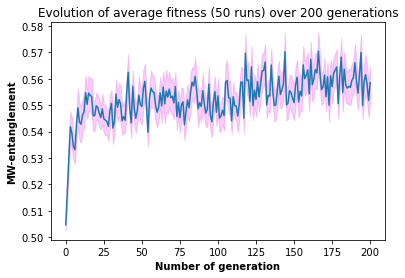

In [4]:
# plot the mean fitness with standard error
plt.plot(mean_fitness)
plt.fill_between(range(len(mean_fitness)), mean_fitness - standard_error, mean_fitness + standard_error, alpha=0.4, color='violet')

plt.xlabel("Number of generation", fontweight='bold')
plt.ylabel("MW-entanglement", fontweight='bold')
plt.title("Evolution of average fitness ({} runs) over 200 generations".format(number_of_runs))
plt.savefig("fitness_plot_15gates.pdf")
plt.show()

## Data for 10 gates

Mean fitness:  [0.499999   0.50429588 0.50787213 0.51656562 0.51808449 0.51926221
 0.52132251 0.52197891 0.51792333 0.52139024 0.51852252 0.52470122
 0.52084948 0.52641769 0.52759054 0.52294887 0.52532706 0.52401155
 0.52466427 0.52493533 0.52440823 0.52294141 0.5224771  0.52937199
 0.52834372 0.52698135 0.52380787 0.53064846 0.52965982 0.52768354
 0.52618982 0.53327232 0.52747157 0.53032208 0.52985125 0.52828517
 0.52229007 0.526336   0.52504295 0.52637652 0.5256405  0.52780763
 0.52450242 0.52916453 0.53455842 0.52660653 0.52991834 0.53188639
 0.53454926 0.53187165 0.53174468 0.5263585  0.53082729 0.53311492
 0.53190806 0.53031345 0.53442656 0.52545804 0.52870275 0.5334121
 0.53097608 0.52817822 0.52818159 0.53404196 0.54141245 0.53729429
 0.53218759 0.53010677 0.5389525  0.53673972 0.53385867 0.53324688
 0.53587199 0.53433578 0.5350381  0.53033017 0.542903   0.54407797
 0.53494119 0.54190838 0.5370391  0.5389593  0.53374148 0.53353951
 0.54609098 0.54845259 0.53258276 0.54232853 0.53800476 0.5355068
 0.54106568 0.53765056 0.53404861 0.54220527 0.5402901  0.53181641
 0.52930591 0.53938994 0.53652198 0.53889612 0.5304404  0.5442225
 0.53754634 0.53052473 0.53135109 0.54188567 0.54157556 0.53572399
 0.54446419 0.53696893 0.53620203 0.54415088 0.53175454 0.53505878
 0.5376702  0.53312424 0.54520219 0.54587271 0.53291197 0.54627485
 0.53638476 0.54972862 0.53956492 0.53821182 0.53650402 0.53177898
 0.53538446 0.52861777 0.54233276 0.54102324 0.53704362 0.53662468
 0.53301091 0.53086121 0.53777335 0.53730704 0.53549627 0.54142834
 0.53163952 0.53733674 0.5371923  0.53048458 0.54417927 0.53620064
 0.53881668 0.5384029  0.53773037 0.54343966 0.54166688 0.53912977
 0.54077806 0.54415772 0.54058412 0.5354463  0.53657274 0.53660613
 0.53519603 0.53740218 0.53364118 0.54104381 0.54933437 0.5343229
 0.54905632 0.53565669 0.54880299 0.54284733 0.54326896 0.53987232
 0.5436486  0.53904788 0.54338535 0.53931395 0.54080926 0.54152885
 0.54033532 0.54120159 0.54049605 0.5398503  0.538574   0.53966297
 0.53605097 0.54284432 0.53694783 0.54197152 0.53942466 0.54107844
 0.54081261 0.5389318  0.5449721  0.53832571 0.54420514 0.54455492
 0.54333026 0.54285851 0.54363905 0.53843476 0.54942605 0.54423483
 0.5518041  0.53983029 0.54097537]
Standard deviation of fitness:  [1.09344287e-16 1.55974935e-02 1.94423693e-02 3.68565790e-02
 2.89517505e-02 2.91199009e-02 4.18105741e-02 4.42653781e-02
 2.99351016e-02 2.96754660e-02 3.23153328e-02 4.12368098e-02
 3.20746781e-02 4.23380510e-02 3.98356134e-02 3.20522679e-02
 3.47422933e-02 3.59749943e-02 3.57340959e-02 3.19331543e-02
 3.55325479e-02 3.85258161e-02 4.02704828e-02 4.54977968e-02
 4.18278470e-02 3.74895950e-02 3.32950737e-02 4.71034192e-02
 4.57090742e-02 3.70107774e-02 4.00628563e-02 3.82429803e-02
 3.38895573e-02 4.08798399e-02 3.60471096e-02 3.46637559e-02
 2.88488461e-02 3.19722743e-02 3.60665409e-02 2.82225325e-02
 3.21970118e-02 3.01197097e-02 2.92219869e-02 3.05468630e-02
 4.62630594e-02 3.13894959e-02 3.21325911e-02 3.37681827e-02
 3.19056729e-02 4.02902153e-02 4.01711492e-02 2.81388753e-02
 3.61540732e-02 3.16272757e-02 3.23495094e-02 3.11940288e-02
 4.11041889e-02 2.71648482e-02 3.38308595e-02 3.34301796e-02
 3.28564189e-02 3.51236970e-02 3.16102137e-02 3.80588415e-02
 3.44124263e-02 3.87784923e-02 3.84408154e-02 3.06763609e-02
 4.71501797e-02 3.70655647e-02 3.93031644e-02 3.73183370e-02
 3.41506695e-02 3.74743477e-02 3.32257722e-02 2.99205587e-02
 3.62207896e-02 4.42163607e-02 3.92437995e-02 4.79954165e-02
 4.52178306e-02 3.05986036e-02 3.36607134e-02 3.48899197e-02
 4.70243918e-02 5.37553617e-02 3.68619592e-02 3.77584821e-02
 3.50128293e-02 4.07902059e-02 4.21423242e-02 4.06292641e-02
 3.62681520e-02 4.63095821e-02 4.07391476e-02 3.17206272e-02
 3.41426019e-02 4.41874857e-02 4.47779032e-02 3.99664064e-02
 3.58986012e-02 5.66676645e-02 3.59056090e-02 3.82848528e-02
 3.48968892e-02 4.12216251e-02 4.32977228e-02 3.63766471e-02
 3.90911331e-02 3.89859569e-02 3.59182857e-02 4.50272392e-02
 3.73322288e-02 3.51633309e-02 3.98781802e-02 3.20268476e-02
 4.48694416e-02 4.31622138e-02 4.02572002e-02 4.38779585e-02
 3.66994745e-02 4.71316782e-02 3.89796361e-02 3.79979867e-02
 4.07604407e-02 3.25933265e-02 4.05686176e-02 3.07503191e-02
 4.29590351e-02 3.98950981e-02 3.19926337e-02 3.48726741e-02
 3.79022845e-02 3.80741036e-02 3.87658784e-02 3.97265401e-02
 4.29756191e-02 4.87956870e-02 3.74212237e-02 4.11522051e-02
 3.77588933e-02 3.18958384e-02 4.42892574e-02 4.24480781e-02
 3.47910715e-02 3.77522793e-02 4.00227194e-02 4.53312812e-02
 4.64545215e-02 4.38656880e-02 4.63034052e-02 3.70522113e-02
 4.30137481e-02 3.86947479e-02 3.98135688e-02 3.42984183e-02
 4.18054637e-02 3.62868791e-02 3.50636027e-02 5.03078780e-02
 4.99421254e-02 3.37887518e-02 4.87770446e-02 4.19447648e-02
 4.19971917e-02 4.17616104e-02 4.82570016e-02 3.93442894e-02
 4.52829713e-02 3.65443173e-02 4.04577635e-02 3.44095678e-02
 4.91607794e-02 3.75342912e-02 4.22836239e-02 4.30727413e-02
 4.46889386e-02 4.50354313e-02 3.24361728e-02 3.66236577e-02
 3.52100568e-02 4.40923558e-02 3.94211716e-02 3.44740081e-02
 3.89094097e-02 4.11357670e-02 3.85025326e-02 4.16068014e-02
 4.20183649e-02 3.83521043e-02 3.52416483e-02 4.80804534e-02
 3.39178703e-02 4.63860952e-02 3.92933460e-02 4.07171701e-02
 4.65296326e-02 4.04711242e-02 4.76525843e-02 2.83394720e-02
 4.39187252e-02]
Standard error of the mean fitness:  [1.54636174e-17 2.20581869e-03 2.74956623e-03 5.21230739e-03
 4.09439583e-03 4.11817587e-03 5.91290809e-03 6.26006980e-03
 4.23346266e-03 4.19674464e-03 4.57007820e-03 5.83176556e-03
 4.53604447e-03 5.98750459e-03 5.63360648e-03 4.53287520e-03
 4.91330224e-03 5.08763249e-03 5.05356431e-03 4.51602999e-03
 5.02506111e-03 5.44837316e-03 5.69510629e-03 6.43436013e-03
 5.91535084e-03 5.30182937e-03 4.70863448e-03 6.66142943e-03
 6.46423927e-03 5.23411433e-03 5.66574348e-03 5.40837414e-03
 4.79270715e-03 5.78128240e-03 5.09783113e-03 4.90219538e-03
 4.07984293e-03 4.52156240e-03 5.10057913e-03 3.99126882e-03
 4.55334507e-03 4.25957020e-03 4.13261301e-03 4.31997879e-03
 6.54258460e-03 4.43914508e-03 4.54423461e-03 4.77554220e-03
 4.51214353e-03 5.69789689e-03 5.68105840e-03 3.97943790e-03
 5.11295807e-03 4.47277222e-03 4.57491149e-03 4.41150186e-03
 5.81301015e-03 3.84168967e-03 4.78440603e-03 4.72774133e-03
 4.64659933e-03 4.96724086e-03 4.47035929e-03 5.38233299e-03
 4.86665200e-03 5.48410698e-03 5.43635225e-03 4.33829256e-03
 6.66804237e-03 5.24186243e-03 5.55830682e-03 5.27760984e-03
 4.82963399e-03 5.29967307e-03 4.69883377e-03 4.23140599e-03
 5.12239319e-03 6.25313770e-03 5.54991135e-03 6.78757690e-03
 6.39476692e-03 4.32729602e-03 4.76034374e-03 4.93417977e-03
 6.65025326e-03 7.60215616e-03 5.21306826e-03 5.33985574e-03
 4.95156180e-03 5.76860624e-03 5.95982465e-03 5.74584563e-03
 5.12909125e-03 6.54916391e-03 5.76138551e-03 4.48597412e-03
 4.82849306e-03 6.24905415e-03 6.33255180e-03 5.65210340e-03
 5.07682886e-03 8.01401798e-03 5.07781992e-03 5.41429580e-03
 4.93516540e-03 5.82961813e-03 6.12322268e-03 5.14443477e-03
 5.52832106e-03 5.51344690e-03 5.07961267e-03 6.36781324e-03
 5.27957443e-03 4.97284594e-03 5.63962633e-03 4.52928022e-03
 6.34549728e-03 6.10405881e-03 5.69322785e-03 6.20528040e-03
 5.19008946e-03 6.66542585e-03 5.51255300e-03 5.37372681e-03
 5.76439681e-03 4.60939244e-03 5.73726893e-03 4.34875184e-03
 6.07532501e-03 5.64201888e-03 4.52444165e-03 4.93174086e-03
 5.36019248e-03 5.38449137e-03 5.48232309e-03 5.61818118e-03
 6.07767034e-03 6.90075224e-03 5.29216021e-03 5.81980066e-03
 5.33991390e-03 4.51075272e-03 6.26344684e-03 6.00306477e-03
 4.92020052e-03 5.33897854e-03 5.66006725e-03 6.41081126e-03
 6.56966143e-03 6.20354509e-03 6.54829036e-03 5.23997398e-03
 6.08306259e-03 5.47226373e-03 5.63048889e-03 4.85052883e-03
 5.91218537e-03 5.13173966e-03 4.95874225e-03 7.11460834e-03
 7.06288310e-03 4.77845110e-03 6.89811580e-03 5.93188552e-03
 5.93929981e-03 5.90598358e-03 6.82457062e-03 5.56412277e-03
 6.40397921e-03 5.16814691e-03 5.72159179e-03 4.86624774e-03
 6.95238409e-03 5.30815036e-03 5.97980744e-03 6.09140549e-03
 6.31997030e-03 6.36897178e-03 4.58716755e-03 5.17936734e-03
 4.97945399e-03 6.23560076e-03 5.57499555e-03 4.87536098e-03
 5.50262150e-03 5.81747596e-03 5.44508039e-03 5.88409028e-03
 5.94229415e-03 5.42380660e-03 4.98392170e-03 6.79960293e-03
 4.79671122e-03 6.55998449e-03 5.55691828e-03 5.75827742e-03
 6.58028375e-03 5.72348127e-03 6.73909310e-03 4.00780657e-03
 6.21104568e-03]

## Data for 5 gates 5% mutation and 20 chromosome
Mean fitness:  [0.499999   0.50093568 0.50203747 0.50338142 0.50290529 0.50239689
 0.50501679 0.50355531 0.50552064 0.50570428 0.50270449 0.50735399
 0.51124257 0.50605629 0.51555178 0.50584168 0.51172586 0.50480612
 0.51497842 0.51066604 0.50512671 0.50954088 0.50734234 0.51477673
 0.50533887 0.50959466 0.51763252 0.51120267 0.51597283 0.51395179
 0.50873761 0.51736059 0.52333599 0.51774924 0.51468578 0.51489672
 0.51537359 0.51377634 0.51633627 0.51159427 0.52235092 0.51178075
 0.51068875 0.51142648 0.51609419 0.51496233 0.50929878 0.51100173
 0.51701042 0.5088482  0.52886892 0.51684509 0.51859468 0.51593232
 0.5118648  0.51733867 0.51945403 0.50868066 0.51881653 0.51424658
 0.50974002 0.51819548 0.5162322  0.51018648 0.51445581 0.52124997
 0.51627723 0.51503509 0.51324622 0.51070011 0.51894307 0.51845209
 0.51283194 0.51714902 0.5163397  0.51778751 0.5245545  0.51181608
 0.51105569 0.51551163 0.51045808 0.51889879 0.51336661 0.51287276
 0.51952778 0.50990888 0.51538991 0.51176859 0.51423736 0.52404092
 0.51332379 0.51220961 0.51410416 0.5233677  0.51369884 0.52584294
 0.50847747 0.52278759 0.51582716 0.52393582 0.51993197 0.51806829
 0.51577927 0.51286633 0.52173891 0.52619968 0.51427248 0.52506852
 0.51871916 0.51964586 0.51971766 0.5183614  0.52166574 0.5186168
 0.52049223 0.51269748 0.52879887 0.52105051 0.52506295 0.51676972
 0.51370037 0.51410724 0.52797171 0.51779295 0.51480186 0.51534726
 0.51604088 0.51814543 0.53012028 0.52142469 0.51554315 0.51507006
 0.51378261 0.51527801 0.51702992 0.51149188 0.51245572 0.51747432
 0.51533384 0.51619745 0.5151447  0.52616191 0.52275322 0.52095341
 0.52045568 0.52382492 0.52017094 0.52150515 0.52073079 0.52185693
 0.51845642 0.51335439 0.51132783 0.52083477 0.51166623 0.5230127
 0.51896505 0.51681812 0.52126948 0.51637534 0.51837419 0.516637
 0.51580266 0.51302101 0.51376715 0.51470769 0.52365351 0.52104681
 0.51988763 0.51867158 0.51694226 0.52131239 0.51558702 0.51639166
 0.51496999 0.51611567 0.51434643 0.51759182 0.51773032 0.5100129
 0.51410748 0.52250785 0.52415189 0.52038644 0.517835   0.51883019
 0.51938984 0.51379992 0.51090246 0.51371725 0.51189995 0.51893757
 0.52027035 0.52106247 0.51564585 0.51897135 0.52500992 0.52990559
 0.51131415 0.5177179  0.51878858]
Standard deviation of fitness:  [1.10186489e-16 6.55674856e-03 1.06204956e-02 1.34067836e-02
 1.20035017e-02 1.05176716e-02 1.48680256e-02 1.29466924e-02
 1.50612198e-02 1.55348875e-02 9.72431260e-03 2.63801746e-02
 2.44163151e-02 1.60169580e-02 4.58371046e-02 1.66620382e-02
 4.50050130e-02 1.51396029e-02 4.66754049e-02 2.70263035e-02
 1.48603687e-02 1.86039553e-02 1.75138591e-02 2.43506252e-02
 1.55465222e-02 2.00505386e-02 4.94492617e-02 2.12074876e-02
 3.63841464e-02 2.37590843e-02 1.78556638e-02 4.63773481e-02
 6.14132315e-02 4.58192138e-02 3.56865319e-02 3.17383347e-02
 2.83425397e-02 2.22023437e-02 3.11766729e-02 2.24376827e-02
 3.70933066e-02 2.96314230e-02 1.86918802e-02 3.34858180e-02
 3.84802207e-02 2.50733250e-02 1.91137096e-02 2.05907608e-02
 3.27713254e-02 1.89118080e-02 6.61440875e-02 3.93444121e-02
 4.13436356e-02 4.31685115e-02 2.07572548e-02 3.61904287e-02
 4.35540709e-02 1.88434101e-02 4.40961073e-02 3.64448257e-02
 1.89842805e-02 3.77907382e-02 3.48056400e-02 1.95076682e-02
 2.27578823e-02 3.88405424e-02 3.21722689e-02 2.27368009e-02
 2.15827231e-02 2.06942592e-02 4.54466677e-02 4.89650855e-02
 2.17349987e-02 3.73645570e-02 3.83138121e-02 2.64952362e-02
 5.05937427e-02 2.11762792e-02 2.36758932e-02 2.30187548e-02
 2.05187902e-02 3.69265409e-02 2.48871934e-02 2.11634636e-02
 3.13034127e-02 1.86098295e-02 2.38423282e-02 2.36474992e-02
 2.33163964e-02 5.50225135e-02 2.36830754e-02 2.62608896e-02
 2.59876555e-02 5.43479975e-02 2.24694684e-02 5.92063969e-02
 1.69769169e-02 5.45666021e-02 2.68118155e-02 5.74133270e-02
 3.43751422e-02 2.76582485e-02 3.43729315e-02 2.12152980e-02
 4.88006365e-02 5.78112344e-02 2.30772172e-02 5.62524100e-02
 3.10126293e-02 2.78773291e-02 3.42894455e-02 3.42722043e-02
 4.57261565e-02 3.48171502e-02 3.48553505e-02 2.84217767e-02
 5.08547687e-02 4.82475266e-02 5.14671367e-02 3.95712523e-02
 2.84359017e-02 2.47373304e-02 5.43716118e-02 2.55859803e-02
 3.39679292e-02 2.31019184e-02 4.54975417e-02 2.39055501e-02
 7.07424378e-02 3.45038826e-02 2.51568232e-02 3.71511365e-02
 2.74675252e-02 2.80538856e-02 2.36423457e-02 2.00895107e-02
 2.02061570e-02 3.60608557e-02 3.55960964e-02 2.36880960e-02
 2.29192624e-02 5.51607174e-02 3.61983815e-02 3.64302764e-02
 3.23390749e-02 4.16046763e-02 3.37693073e-02 4.99297458e-02
 2.73370174e-02 3.70279015e-02 3.50244715e-02 2.19989332e-02
 1.93390782e-02 3.01037691e-02 1.99888624e-02 4.21438217e-02
 4.58870424e-02 2.60802091e-02 3.03854301e-02 2.38511432e-02
 2.59826130e-02 2.92950147e-02 2.60508996e-02 2.11638025e-02
 2.39316422e-02 2.06938299e-02 4.03624194e-02 3.38919712e-02
 3.77173639e-02 2.68338835e-02 3.67974258e-02 2.54444573e-02
 2.18481990e-02 2.56981122e-02 2.62574296e-02 2.37066899e-02
 1.98903036e-02 3.96059437e-02 2.42983713e-02 1.74979758e-02
 2.78549227e-02 4.41645239e-02 5.63465274e-02 2.93916274e-02
 3.52346794e-02 2.83805306e-02 3.56209396e-02 2.19386792e-02
 1.74696777e-02 2.20658443e-02 1.95727236e-02 4.38796886e-02
 3.03311763e-02 3.10177123e-02 2.69091910e-02 2.99206117e-02
 5.48742548e-02 6.58940857e-02 1.91827552e-02 2.39208170e-02
 3.10218871e-02]
Standard error of the mean fitness:  [1.55827227e-17 9.27264274e-04 1.50196489e-03 1.89600552e-03
 1.69755149e-03 1.48742339e-03 2.10265635e-03 1.83093880e-03
 2.12997813e-03 2.19696486e-03 1.37522548e-03 3.73072007e-03
 3.45298839e-03 2.26513992e-03 6.48234549e-03 2.35636804e-03
 6.36466998e-03 2.14106318e-03 6.60089906e-03 3.82209649e-03
 2.10157350e-03 2.63099658e-03 2.47683370e-03 3.44369844e-03
 2.19861025e-03 2.83557436e-03 6.99318166e-03 2.99919166e-03
 5.14549533e-03 3.36004193e-03 2.52517219e-03 6.55874747e-03
 8.68514250e-03 6.47981536e-03 5.04683775e-03 4.48847834e-03
 4.00824040e-03 3.13988555e-03 4.40904736e-03 3.17316751e-03
 5.24578572e-03 4.19051603e-03 2.64343105e-03 4.73560980e-03
 5.44192499e-03 3.54590363e-03 2.70308673e-03 2.91197331e-03
 4.63456529e-03 2.67453354e-03 9.35418657e-03 5.56414011e-03
 5.84687302e-03 6.10494944e-03 2.93551912e-03 5.11809951e-03
 6.15947578e-03 2.66486061e-03 6.23613131e-03 5.15407668e-03
 2.68478269e-03 5.34441745e-03 4.92226081e-03 2.75880090e-03
 3.21845058e-03 5.49288218e-03 4.54984591e-03 3.21546922e-03
 3.05225797e-03 2.92661020e-03 6.42712939e-03 6.92470880e-03
 3.07379300e-03 5.28414633e-03 5.41839127e-03 3.74699223e-03
 7.15503571e-03 2.99477813e-03 3.34827692e-03 3.25534352e-03
 2.90179513e-03 5.22220150e-03 3.51958064e-03 2.99296572e-03
 4.42697108e-03 2.63182733e-03 3.37181439e-03 3.34426141e-03
 3.29743641e-03 7.78135848e-03 3.34929264e-03 3.71385062e-03
 3.67520948e-03 7.68596752e-03 3.17766270e-03 8.37304895e-03
 2.40089861e-03 7.71688288e-03 3.79176332e-03 8.11947057e-03
 4.86137923e-03 3.91146701e-03 4.86106659e-03 3.00029622e-03
 6.90145220e-03 8.17574318e-03 3.26361136e-03 7.95529212e-03
 4.38584810e-03 3.94244969e-03 4.84925989e-03 4.84682162e-03
 6.46665507e-03 4.92388860e-03 4.92929094e-03 4.01944620e-03
 7.19195037e-03 6.82323064e-03 7.27855227e-03 5.59622017e-03
 4.02144378e-03 3.49838682e-03 7.68930708e-03 3.61840404e-03
 4.80379061e-03 3.26710463e-03 6.43432405e-03 3.38075532e-03
 1.00044915e-02 4.87958587e-03 3.55771205e-03 5.25396411e-03
 3.88449466e-03 3.96741855e-03 3.34353260e-03 2.84108585e-03
 2.85758213e-03 5.09977512e-03 5.03404823e-03 3.35000267e-03
 3.24127317e-03 7.80090346e-03 5.11922421e-03 5.15201909e-03
 4.57343583e-03 5.88378974e-03 4.77570124e-03 7.06113236e-03
 3.86603808e-03 5.23653604e-03 4.95320826e-03 3.11111897e-03
 2.73495867e-03 4.25731585e-03 2.82685203e-03 5.96003643e-03
 6.48940777e-03 3.68829854e-03 4.29714873e-03 3.37306102e-03
 3.67449637e-03 4.14294070e-03 3.68415356e-03 2.99301365e-03
 3.38444530e-03 2.92654948e-03 5.70810809e-03 4.79304853e-03
 5.33404075e-03 3.79488420e-03 5.20394187e-03 3.59838966e-03
 3.08980193e-03 3.63426189e-03 3.71336130e-03 3.35263223e-03
 2.81291371e-03 5.60112627e-03 3.43630862e-03 2.47458747e-03
 3.93928095e-03 6.24580687e-03 7.96860232e-03 4.15660381e-03
 4.98293615e-03 4.01361313e-03 5.03756159e-03 3.10259777e-03
 2.47058552e-03 3.12058163e-03 2.76800111e-03 6.20552507e-03
 4.28947609e-03 4.38656694e-03 3.80553428e-03 4.23141348e-03
 7.76039154e-03 9.31883096e-03 2.71285126e-03 3.38291439e-03
 4.38715734e-03]

## Data for 5 gates 5% mutation and 20 chromosome
Mean fitness:  [0.50465727 0.51777977 0.5300838  0.54190364 0.53936465 0.53433422
 0.53311222 0.5421324  0.54906329 0.54361824 0.54276026 0.54624484
 0.54758505 0.55474458 0.55033193 0.55458483 0.55376769 0.55325779
 0.54594023 0.54607946 0.54978727 0.54919343 0.54697049 0.54530932
 0.54859749 0.54486562 0.5443804  0.54386261 0.54197792 0.54776683
 0.55068818 0.54132509 0.54388301 0.55420057 0.54922777 0.55208151
 0.55045758 0.5440958  0.54565899 0.54426995 0.55454685 0.56247519
 0.54889346 0.5433262  0.55718596 0.54858422 0.54500666 0.54804336
 0.55380678 0.55018352 0.54952876 0.55648292 0.55903991 0.54996847
 0.53978684 0.55273838 0.55649019 0.55519894 0.55478094 0.54996956
 0.54733409 0.54912361 0.55468418 0.54974812 0.55682857 0.55049429
 0.55535225 0.5530494  0.55609579 0.55280741 0.55343033 0.55087856
 0.55703944 0.5457209  0.55104392 0.54528377 0.55006661 0.55125142
 0.54255375 0.54762088 0.55199599 0.54900836 0.55493003 0.55872588
 0.55726324 0.56085939 0.55539555 0.54863429 0.55094466 0.5494667
 0.55550237 0.55053198 0.54699104 0.54850927 0.55797371 0.54615916
 0.54369709 0.5511646  0.55516231 0.54734319 0.55352132 0.54509133
 0.54590735 0.54811588 0.54606654 0.55872628 0.55936753 0.55284631
 0.5526347  0.5440759  0.55321101 0.54979888 0.54963033 0.54587469
 0.55034486 0.55865195 0.55878519 0.54511673 0.56971404 0.55928227
 0.55954933 0.55136893 0.56454032 0.54979738 0.55569277 0.55218241
 0.55887959 0.55307516 0.55792169 0.56291836 0.56312589 0.56630293
 0.55010085 0.55376639 0.55344698 0.56523346 0.55564285 0.5498789
 0.55014529 0.55574638 0.56097356 0.55403763 0.55583298 0.55806573
 0.57024433 0.55006325 0.5507903  0.55545851 0.55477269 0.55267068
 0.5509693  0.55765973 0.56063369 0.551251   0.5552274  0.55350512
 0.56526655 0.56001971 0.56130907 0.56336131 0.55429819 0.5674027
 0.55774703 0.55990571 0.56352696 0.56222818 0.57045244 0.5624348
 0.55588132 0.55684724 0.56143667 0.55323638 0.56076137 0.55002701
 0.56118005 0.55701211 0.56212971 0.56322906 0.56446569 0.55057207
 0.56093446 0.56818449 0.5548144  0.56363947 0.55754988 0.55647027
 0.55714244 0.55674131 0.55937506 0.56046098 0.56608442 0.5592915
 0.55455519 0.56131838 0.5699572  0.54979503 0.55880561 0.56155495
 0.55790966 0.55174721 0.55848051]
Standard deviation of fitness:  [0.01321042 0.02764283 0.04058433 0.04149402 0.0415343  0.03517083
 0.03753477 0.0398008  0.05098382 0.04856945 0.0497298  0.04266666
 0.04598734 0.04625289 0.03993959 0.04676378 0.04317177 0.04945733
 0.04029854 0.04045685 0.03529772 0.03443757 0.03842302 0.03099429
 0.04196536 0.03783621 0.04170011 0.0331902  0.03938835 0.04352387
 0.03514306 0.04193552 0.03719174 0.03954506 0.0384663  0.04547351
 0.04878121 0.03930539 0.04012557 0.03546769 0.04464001 0.04912382
 0.03697775 0.03972828 0.04318763 0.03812955 0.03858343 0.03440654
 0.05030159 0.04731088 0.04898988 0.0512752  0.04636644 0.0440819
 0.03815718 0.03913214 0.04705577 0.04398155 0.04371701 0.04204405
 0.04044748 0.0352349  0.04150329 0.04595554 0.04222494 0.05174395
 0.05666489 0.04465692 0.04682681 0.04237422 0.04862986 0.04441846
 0.03910174 0.03682712 0.03434476 0.03983238 0.04640925 0.03643572
 0.0404756  0.04306283 0.04178157 0.03587296 0.05164592 0.04038448
 0.04546148 0.0505982  0.04133061 0.04844699 0.03581738 0.04062976
 0.04654219 0.03736232 0.03743419 0.04611723 0.04774976 0.0409933
 0.04090566 0.03849958 0.04114068 0.03729212 0.04788253 0.03851862
 0.03797297 0.0365791  0.04042385 0.04791433 0.05513187 0.03864418
 0.04813996 0.03570254 0.03911438 0.033576   0.0392518  0.04289399
 0.04336778 0.04095968 0.03701456 0.04127949 0.05046294 0.03904201
 0.04838757 0.04060128 0.05582572 0.03839734 0.04237637 0.0458817
 0.04895299 0.03994244 0.04370337 0.04731709 0.04536158 0.04921138
 0.03534199 0.04059857 0.04498303 0.04351952 0.03828074 0.04246093
 0.0399363  0.04865823 0.04231093 0.03749071 0.04578098 0.0445995
 0.05126541 0.04117852 0.04260304 0.04290663 0.04768337 0.04595368
 0.04805046 0.0486131  0.04770031 0.04381339 0.04870997 0.04194994
 0.05036973 0.04792024 0.04637786 0.04687611 0.04562443 0.04713884
 0.04604657 0.04752668 0.04517277 0.04491022 0.05062773 0.0433808
 0.04189392 0.04178364 0.04590477 0.04016103 0.03819394 0.04461247
 0.04419703 0.04603018 0.04268139 0.04521606 0.04827599 0.03998749
 0.0419232  0.04953042 0.05099697 0.04600685 0.04651092 0.04118638
 0.04810865 0.04701152 0.04603618 0.04635201 0.05070201 0.04902455
 0.04579545 0.0471335  0.04830843 0.03646867 0.05033483 0.05285903
 0.04746578 0.045031   0.04485542]
Standard error of the mean fitness:  [0.00186824 0.00390929 0.00573949 0.00586814 0.00587384 0.00497391
 0.00530822 0.00562868 0.0072102  0.00686876 0.00703286 0.00603398
 0.00650359 0.00654115 0.00564831 0.0066134  0.00610541 0.00699432
 0.00569907 0.00572146 0.00499185 0.00487021 0.00543384 0.00438326
 0.0059348  0.00535085 0.00589729 0.0046938  0.00557035 0.0061552
 0.00496998 0.00593058 0.00525971 0.00559252 0.00543996 0.00643093
 0.0068987  0.00555862 0.00567461 0.00501589 0.00631305 0.00694716
 0.00522944 0.00561843 0.00610765 0.00539233 0.00545652 0.00486582
 0.00711372 0.00669077 0.00692821 0.00725141 0.0065572  0.00623412
 0.00539624 0.00553412 0.00665469 0.00621993 0.00618252 0.00594593
 0.00572014 0.00498297 0.00586945 0.0064991  0.00597151 0.0073177
 0.00801363 0.00631544 0.00662231 0.00599262 0.0068773  0.00628172
 0.00552982 0.00520814 0.00485708 0.00563315 0.00656326 0.00515279
 0.00572411 0.00609    0.00590881 0.0050732  0.00730384 0.00571123
 0.00642922 0.00715567 0.00584503 0.00685144 0.00506534 0.00574592
 0.00658206 0.00528383 0.00529399 0.00652196 0.00675284 0.00579733
 0.00578493 0.00544466 0.00581817 0.0052739  0.00677161 0.00544735
 0.00537019 0.00517307 0.00571679 0.00677611 0.00779682 0.00546511
 0.00680802 0.0050491  0.00553161 0.00474836 0.00555104 0.00606613
 0.00613313 0.00579257 0.00523465 0.0058378  0.00713654 0.00552137
 0.00684304 0.00574189 0.00789495 0.0054302  0.00599292 0.00648865
 0.006923   0.00564871 0.00618059 0.00669165 0.0064151  0.00695954
 0.00499811 0.0057415  0.00636156 0.00615459 0.00541371 0.00600488
 0.00564785 0.00688131 0.00598367 0.00530199 0.00647441 0.00630732
 0.00725002 0.00582352 0.00602498 0.00606791 0.00674345 0.00649883
 0.00679536 0.00687493 0.00674584 0.00619615 0.00688863 0.00593262
 0.00712336 0.00677695 0.00655882 0.00662928 0.00645227 0.00666644
 0.00651197 0.00672129 0.00638839 0.00635126 0.00715984 0.00613497
 0.00592469 0.0059091  0.00649191 0.00567963 0.00540144 0.00630916
 0.0062504  0.00650965 0.00603606 0.00639452 0.00682726 0.00565509
 0.00592884 0.00700466 0.00721206 0.00650635 0.00657764 0.00582463
 0.00680359 0.00664843 0.0065105  0.00655516 0.00717035 0.00693312
 0.00647645 0.00666568 0.00683184 0.00515745 0.00711842 0.0074754
 0.00671268 0.00636834 0.00634351]